In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from lsda import lsda

seed = 42
n_samples = 1500

In [28]:
def read_file(k,sample,dataset):
    output = []
    with open(f'{dataset}/{sample}_{dataset}.{k}','r') as file:
        for line in file:
            data = line.strip('\n').split(' ')
            output.append(data)
    return np.array(output,dtype=float)

def import_data(sample,dataset):
    # sample = 'train' or 'test'
    # avaialble datasets : newthyroid, pasture

    data=read_file(0,sample,dataset)
    for k in range(1,30):
        data = np.row_stack((data,read_file(k,sample,dataset)))
    return data

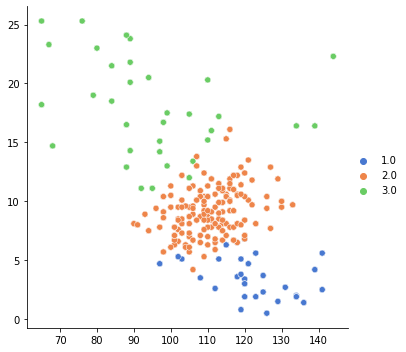

In [29]:
train = import_data('train','newthyroid')
Xtrain = train[:,0:5]
ytrain = train[:,5]
sns.relplot(x=Xtrain[:,0], y=Xtrain[:,1], hue=ytrain, alpha=1, palette="muted")

In [55]:
def grid(dataset):
    #available datasets : newthyroid, pasture
    
    train = import_data('train',dataset)
    test = import_data('test',dataset)

    data = np.row_stack((train,test))
    X = data[:,0:5]
    y = data[:,5]
    
    #n_neighbors = [1,5,10,25]
    n_neighbors = [1,5]
    #alpha = np.linspace(0,1,4)
    alpha = np.linspace(0,1,2)
    plt.figure(figsize=(20,20))

    for i in range(len(n_neighbors)):
        for j in range(len(alpha)):
            LSDA = lsda(n_neighbors=n_neighbors[i], n_components=2,alpha=alpha[j])
            LSDA.fit(Xtrain, ytrain)
            projected_X = LSDA.transform(Xtest)
            
            ax = plt.subplot(len(n_neighbors),len(alpha),1+i+len(alpha)*j, label = f'alpha = {alpha} \n n = {n_neighbors}')
            sns.scatterplot(x=projected_X[:,0], y=projected_X[:,1], hue=ytest, alpha=1, palette="muted", ax=ax)

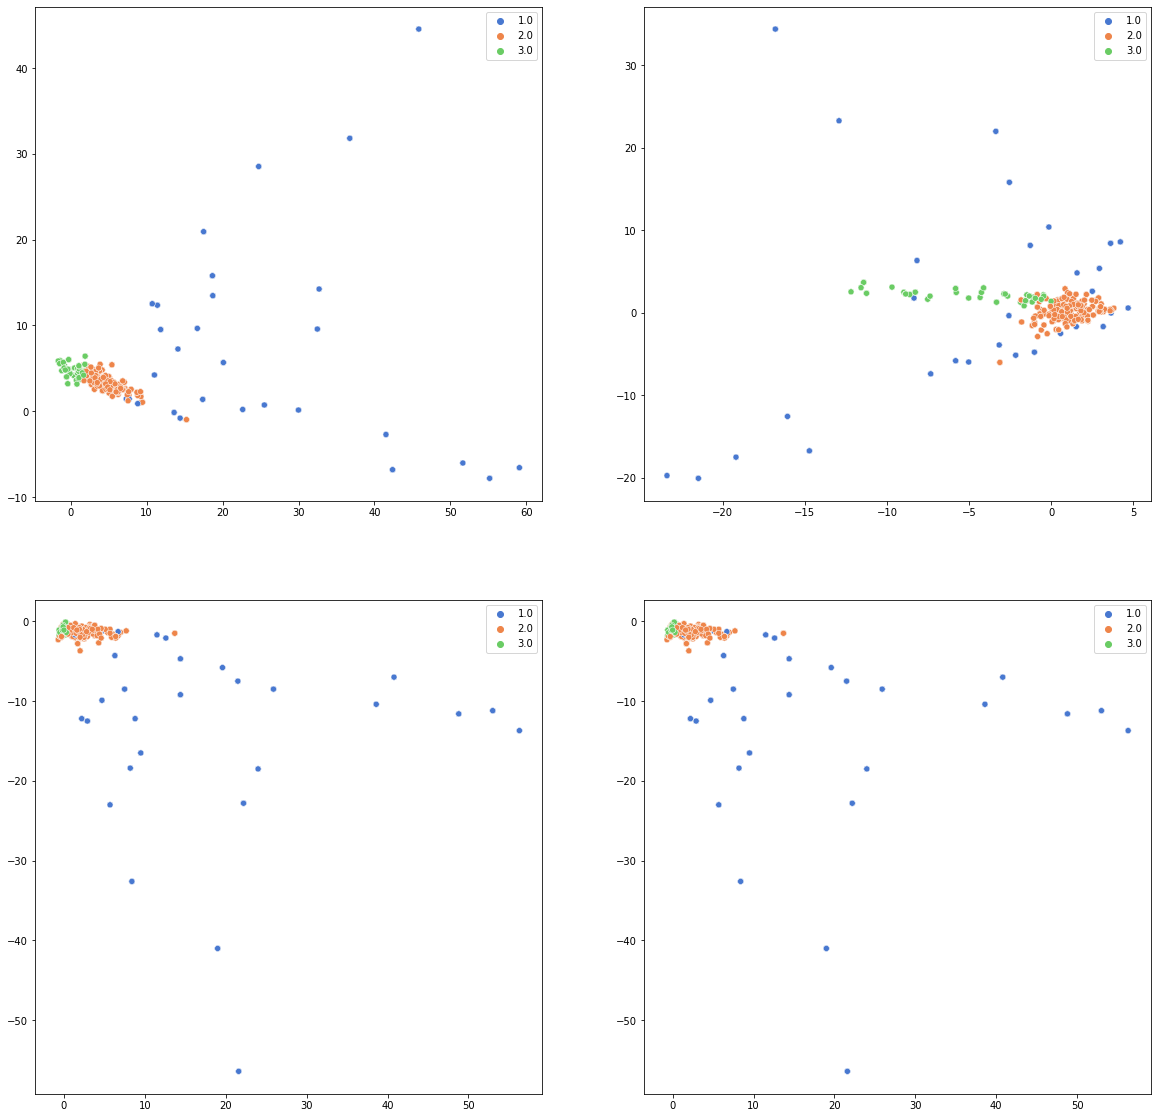

In [56]:
grid('newthyroid')